In [1]:
#first we need to import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
print("all necessary libraries ")

all necessary libraries 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


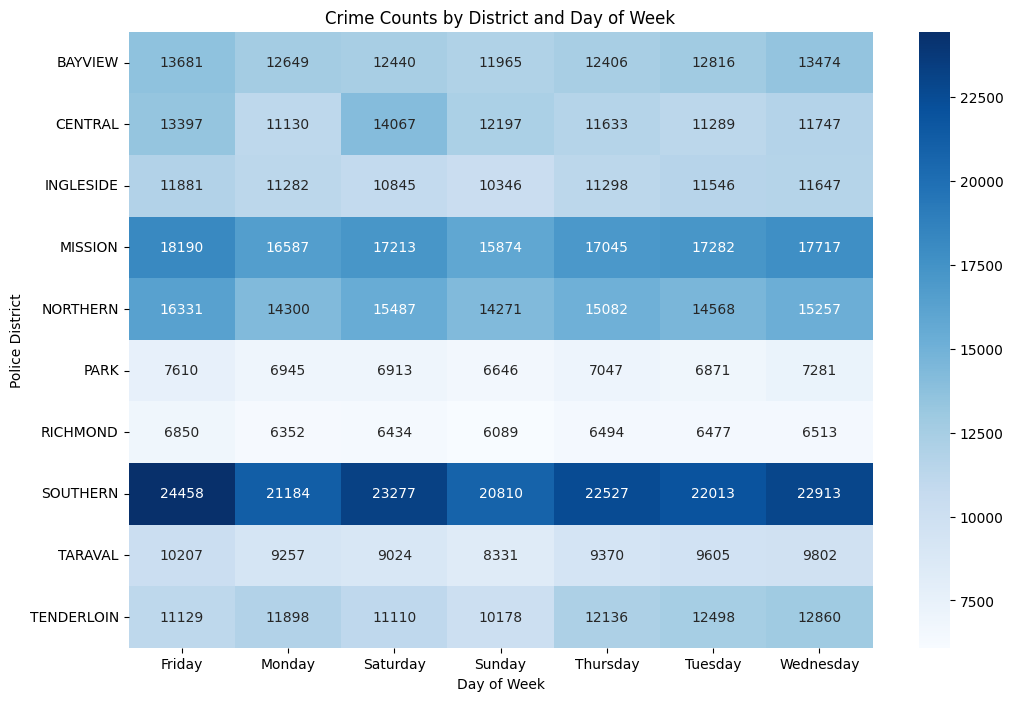


Top Crime Categories in SOUTHERN on Friday:
Category
LARCENY/THEFT     6758
OTHER OFFENSES    3121
NON-CRIMINAL      3094
ASSAULT           1798
WARRANTS          1309
Name: count, dtype: int64

Top Crime Categories in MISSION on Friday:
Category
LARCENY/THEFT     2846
OTHER OFFENSES    2841
NON-CRIMINAL      1906
ASSAULT           1672
DRUG/NARCOTIC     1178
Name: count, dtype: int64

Top Crime Categories in NORTHERN on Friday:
Category
LARCENY/THEFT     4400
OTHER OFFENSES    1883
NON-CRIMINAL      1592
ASSAULT           1239
VEHICLE THEFT     1044
Name: count, dtype: int64

Top Crime Categories in CENTRAL on Saturday:
Category
LARCENY/THEFT     4149
NON-CRIMINAL      1862
OTHER OFFENSES    1561
ASSAULT           1291
VANDALISM          783
Name: count, dtype: int64

Top Crime Categories in BAYVIEW on Friday:
Category
OTHER OFFENSES    2510
LARCENY/THEFT     1649
ASSAULT           1427
VEHICLE THEFT     1158
MISSING PERSON     928
Name: count, dtype: int64

Top Crime Categories in T

In [4]:
%run "1_data_understanding.ipynb"


In [44]:
display(data.head())
display(data.columns)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Index(['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution',
       'Address', 'X', 'Y'],
      dtype='object')

In [7]:
print(data.isnull().sum())

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


there is no missing values in our data 


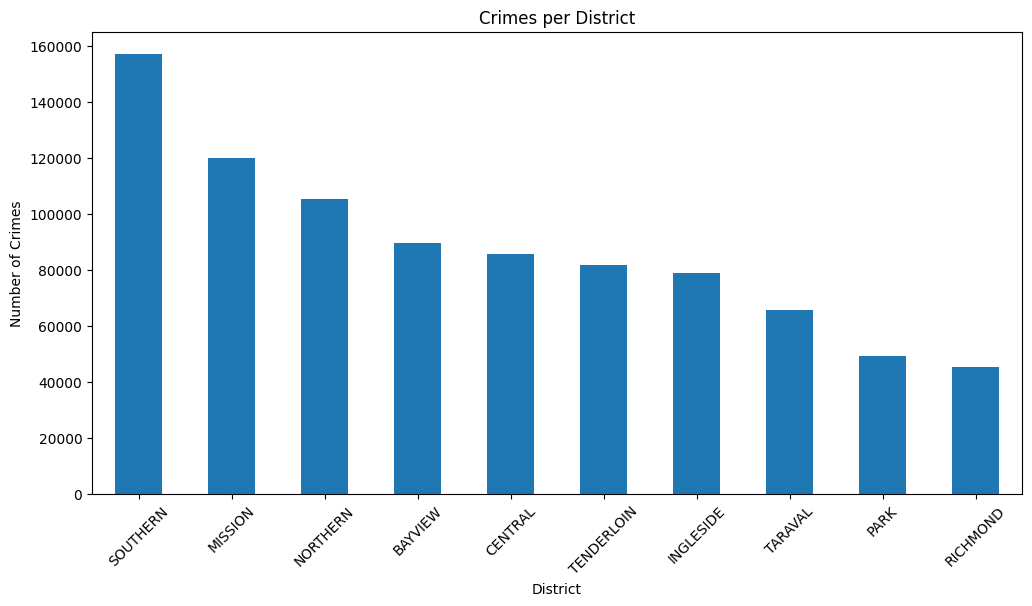

In [11]:
# Crimes per District
district_counts = data['PdDistrict'].value_counts()

# Plotting
plt.figure(figsize=(12,6))
district_counts.plot(kind='bar')
plt.title('Crimes per District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


اكتر مكان بيحصل فيه جرايم هو ال southern

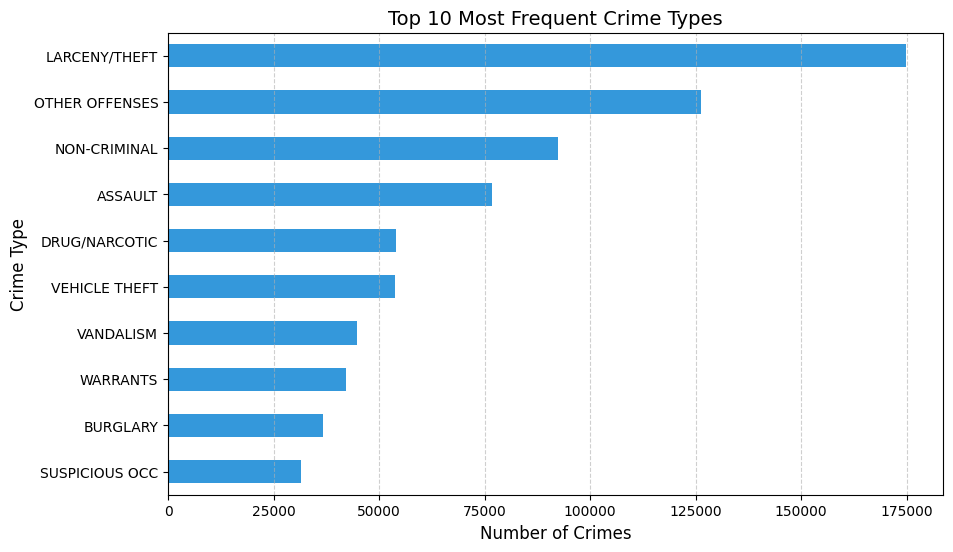

In [64]:
# crime counts
crime_counts =data['Category'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
crime_counts.sort_values().plot(kind='barh', color='#3498db')
plt.title('Top 10 Most Frequent Crime Types', fontsize=14)
plt.xlabel('Number of Crimes', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


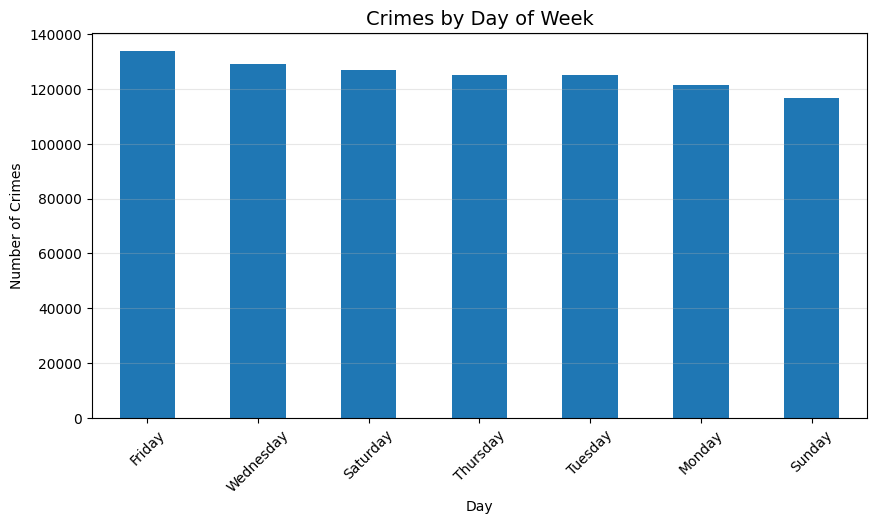

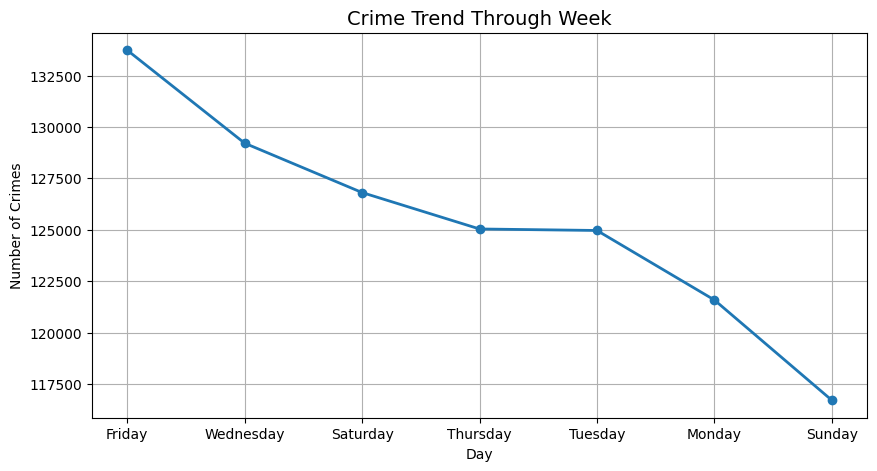

In [45]:
# Count crimes per day
day_counts = data['DayOfWeek'].value_counts()

# Order days logically
weekday_order = [ 'Friday','Wednesday', 'Saturday','Thursday', 'Tuesday', 'Monday', 'Sunday' ]
#day_counts = day_counts.reindex(weekday_order)

# Bar plot 
plt.figure(figsize=(10,5))
day_counts.plot(kind='bar', color='#1f77b4')
plt.title('Crimes by Day of Week', fontsize=14)
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Line plot
plt.figure(figsize=(10,5))
day_counts.plot(kind='line', marker='o', linewidth=2)
plt.title('Crime Trend Through Week', fontsize=14)
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(7), weekday_order)
plt.grid()
plt.show()

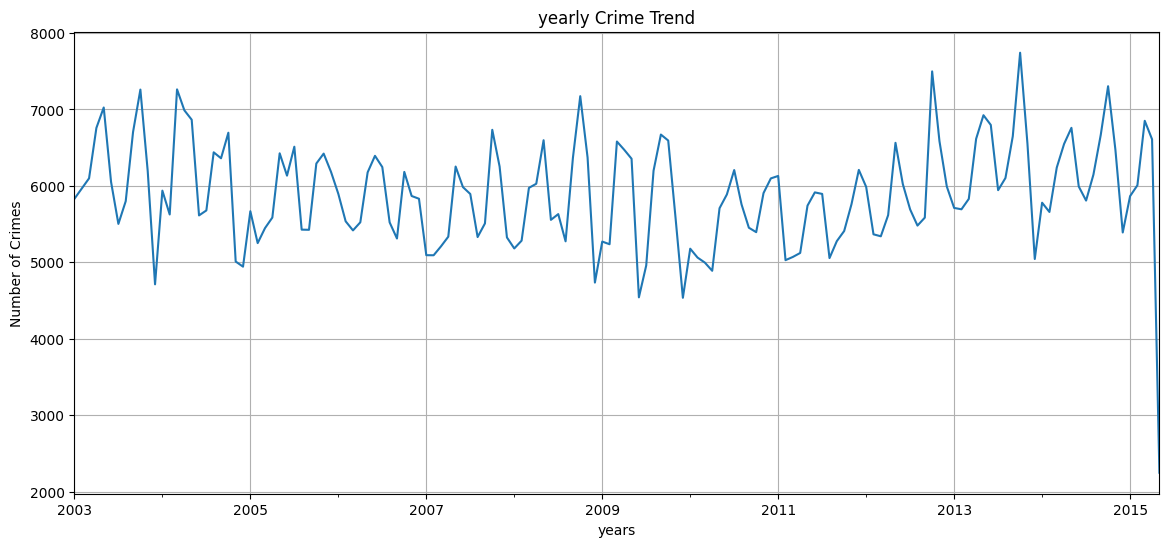

In [48]:
# Make sure the index is datetime 
data.index = pd.to_datetime(data.index)

# Resample by month and count the number of crimes
monthly_crimes = data.resample('ME').size()

# Plot
plt.figure(figsize=(14,6))
monthly_crimes.plot()
plt.title('yearly Crime Trend')
plt.xlabel('years')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


In [57]:
# Extract time components from the index
data['Hour'] = data.index.hour
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['DayOfWeek_Extracted'] = data.index.day_name()

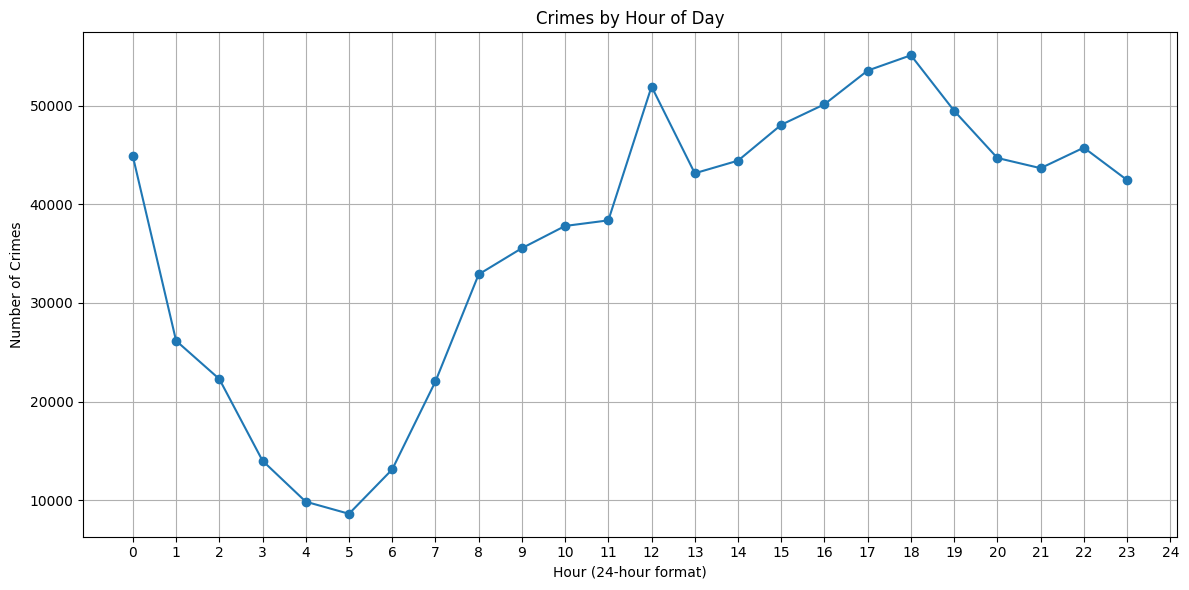

In [61]:
# Plot crimes by hour
crimes_by_hour = data['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
crimes_by_hour.plot(kind='line', marker='o')
plt.title('Crimes by Hour of Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(range(0, 25))  # Set x-ticks for each hour of the day
plt.tight_layout()
plt.show()

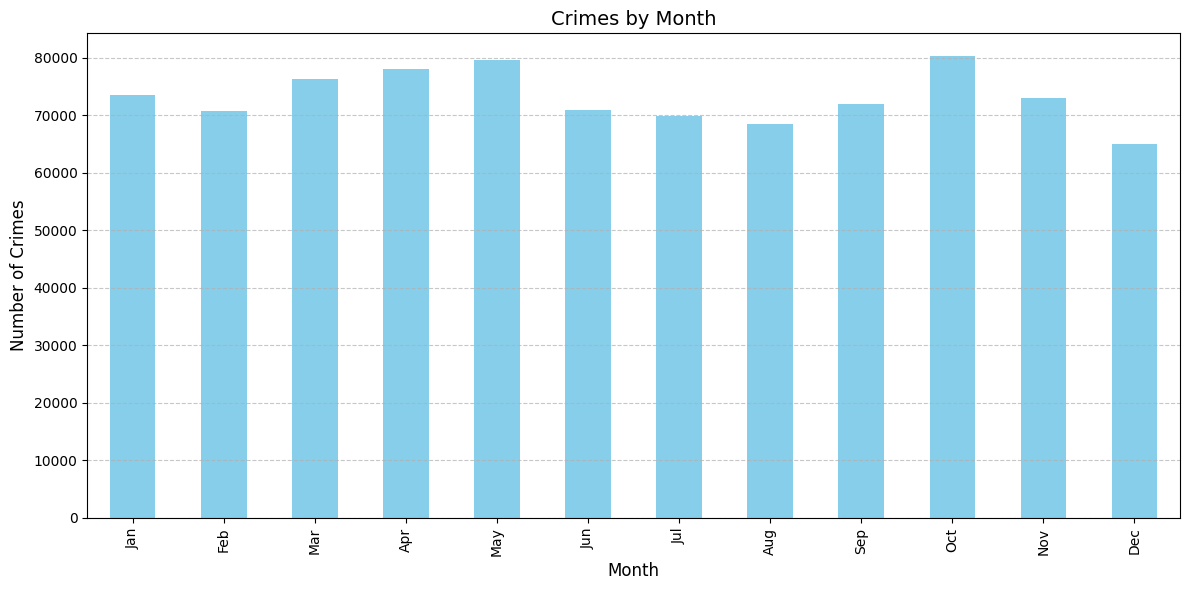

In [62]:
# Count crimes by month
crimes_by_month = data['Month'].value_counts().sort_index()

# Create visualization for crimes by month
plt.figure(figsize=(12, 6))
crimes_by_month.plot(kind='bar', color='skyblue')
plt.title('Crimes by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

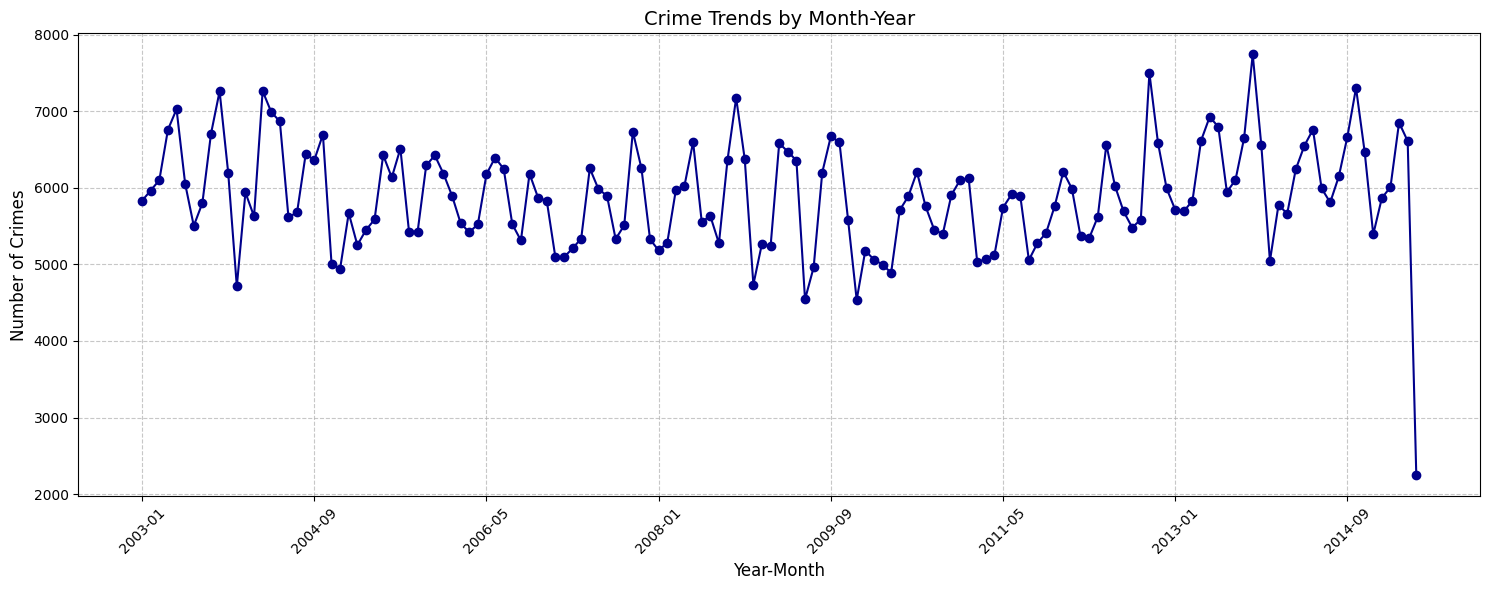

In [63]:
# Create year-month combination for analysis
data['YearMonth'] = data['Year'].astype(str) + '-' + data['Month'].astype(str).str.zfill(2)

# Count crimes by year-month
crimes_by_yearmonth = data['YearMonth'].value_counts().sort_index()

# Create visualization for crime trends over time
plt.figure(figsize=(15, 6))
crimes_by_yearmonth.plot(kind='line', marker='o', color='darkblue')
plt.title('Crime Trends by Month-Year', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()